<a href="https://colab.research.google.com/github/ebtisam12/Customer_Segmentation/blob/main/Customer_Segmentation_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import Libraries

In [ ]:
# import libraties needed in this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.metrics import  confusion_matrix

import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="ticks", palette="pastel");

### Read Customer Segmentation Dataset

In [ ]:
# `read_csv()` function to read in data
df = pd.read_csv('https://github.com/ebtisam12/Customer_Segmentation/raw/main/Train.csv')

In [ ]:
df.shape

(8068, 11)

In [ ]:
# get info for data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
df.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


##EDA

###Cleaning The Data

In [ ]:
# check columns names
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [ ]:
# check 'Var_1' unique values 
df.Var_1.unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5'],
      dtype=object)

In [ ]:
# rename Var_1 column to Category
df = df.rename(columns={'Var_1': 'Category'})

In [ ]:
# check data after the rename
df.head(2) 

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A


In [ ]:
df.describe(exclude='number')

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Category,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


In [ ]:
# check null values
np.sum(df.isna()) 

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Category            76
Segmentation         0
dtype: int64

In [ ]:
# drop 'ID' column
df = df.drop(columns=['ID']) 

In [ ]:
# filling the 'Ever_Married' null values to 'Yes' with the High Spending_Score
df.Ever_Married[(pd.isnull(df['Ever_Married'])) & (df['Spending_Score']== 'High')] = 'Yes'

In [ ]:
# filling the 'Ever_Married' null values to 'Yes' with the Avrage Spending_Score
df.Ever_Married[(pd.isnull(df['Ever_Married'])) & (df['Spending_Score']== 'Avrage')] = 'Yes'

In [ ]:
df = df.dropna(axis=0, subset=['Ever_Married'])

In [ ]:
df.Ever_Married.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# check 'Ever_Married' null values
df['Ever_Married'].isnull().sum()

0

In [ ]:
df.Age.value_counts()

35    247
42    232
37    230
33    229
27    227
     ... 
78     29
87     28
76     27
80     23
85     22
Name: Age, Length: 67, dtype: int64

In [ ]:
# filling the 'Graduated' null values to 'No' with age less than 23
df.Graduated[(pd.isnull(df['Graduated'])) & (df['Age'] < 23 )] = 'No'

In [ ]:
# filling the 'Graduated' null values to 'Yes' with age greater than 23
df.Graduated[(pd.isnull(df['Graduated'])) & (df['Age'] > 23 )] = 'Yes'

In [ ]:
# drop all remaining null values of 'Graduated'
df = df.dropna(axis=0, subset=['Graduated'])

In [ ]:
# check Graduated values after cleaning
df.Graduated.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# check null values
np.sum(df.isna()) 

Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession         123
Work_Experience    815
Spending_Score       0
Family_Size        330
Category            76
Segmentation         0
dtype: int64

In [ ]:
# filling null values for the three columns with the 'mode' 
for column in ['Family_Size', 'Profession','Work_Experience']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:
# check valus counts for the three columns
for column in ['Family_Size', 'Profession','Work_Experience']:
    print(column,'Valus Counts')
    print(df[column].value_counts())

Family_Size Valus Counts
2.0    2699
3.0    1472
1.0    1436
4.0    1361
5.0     603
6.0     209
7.0      95
8.0      49
9.0      44
Name: Family_Size, dtype: int64
Profession Valus Counts
Artist           2613
Healthcare       1304
Entertainment     941
Engineer          685
Doctor            681
Lawyer            620
Executive         594
Marketing         289
Homemaker         241
Name: Profession, dtype: int64
Work_Experience Valus Counts
1.0     3142
0.0     2293
9.0      468
8.0      453
2.0      282
3.0      252
4.0      250
6.0      201
7.0      196
5.0      191
10.0      53
11.0      50
12.0      47
14.0      45
13.0      45
Name: Work_Experience, dtype: int64


In [ ]:
# remove 'Category' null value
df = df.dropna(axis=0, subset=['Category'])

In [ ]:
df.Category.unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [ ]:
# check after cleaning
np.sum(df.isna()) 

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Category           0
Segmentation       0
dtype: int64

In [ ]:
# the data type of data(columns), 'Work_Experience' data type is 'bool' and must be 'int'
pd.DataFrame(df.dtypes, columns=['DataType'])

,DataType
Gender,object
Ever_Married,object
Age,int64
Graduated,object
Profession,object
Work_Experience,float64
Spending_Score,object
Family_Size,float64
Category,object
Segmentation,object


In [ ]:
# change 'Work_Experience' data type from bool to int
df.Work_Experience= df.Work_Experience.astype(int)

In [ ]:
# change 'Family_Size' data type from float64 to int
df.Family_Size= df.Family_Size.astype(int)

In [ ]:
# the data type of data(columns) after converting
pd.DataFrame(df.dtypes, columns=['DataType'])

,DataType
Gender,object
Ever_Married,object
Age,int64
Graduated,object
Profession,object
Work_Experience,int64
Spending_Score,object
Family_Size,int64
Category,object
Segmentation,object


###Visualizing The Data

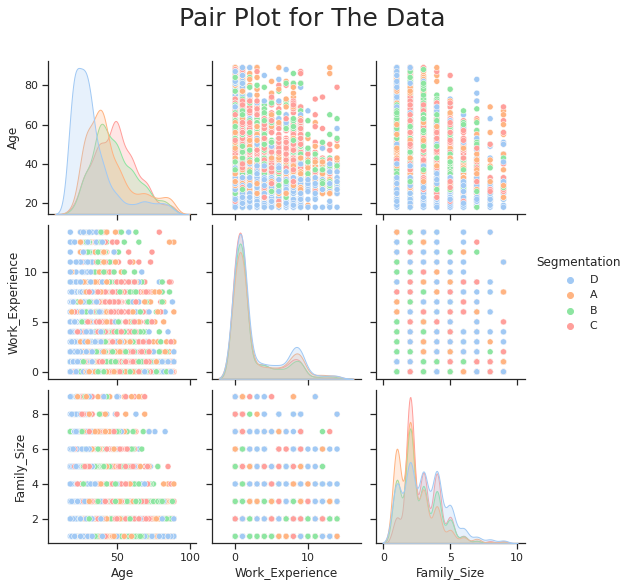

In [ ]:
# pair plot for distribution the data
p = sns.pairplot(df, hue="Segmentation");
p.fig.suptitle("Pair Plot for The Data",fontsize=25,horizontalalignment='center', y=1.08);
pl.savefig("Data_Distribution.png")

In [ ]:
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Category',
       'Segmentation'],
      dtype='object')

####Distribution of Segmentation

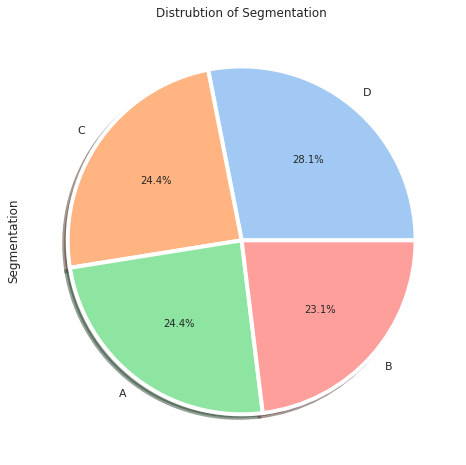

In [ ]:
# pieplot for distribution of segmentation(target)
pl.figure(figsize=(8,8))
df['Segmentation'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,center=(0, 0),wedgeprops = {'linewidth': 4}).set_title('Distrubtion of Segmentation');
pl.savefig("Segmentation_Distribution.png") # save plot as .png in the files

####Gender

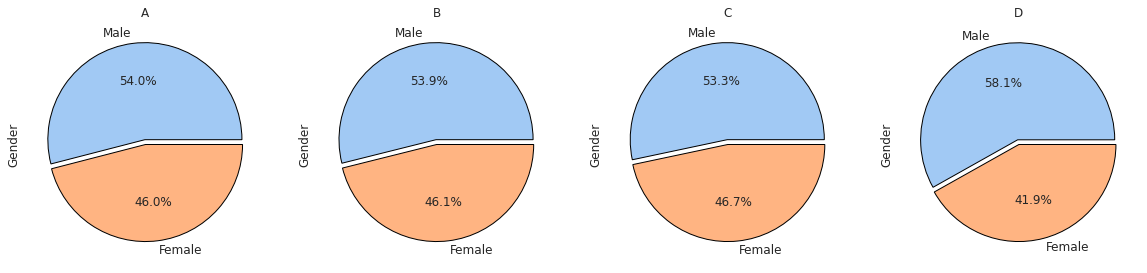

In [ ]:
# pie plot for the relationship between Gender & Segmentation
pl.figure(figsize=(20,20))
pl.subplot(1, 4 , 1)
df['Gender'][df['Segmentation']=='A'].value_counts().plot.pie(explode= (0.05 , 0), autopct='%1.1f%%', textprops={'fontsize': 12},
                                  wedgeprops = {"edgecolor" : "black",'linewidth': 1,'antialiased': True}).set(title = 'A');
pl.subplot(1, 4 , 2)
df['Gender'][df['Segmentation']=='B'].value_counts().plot.pie(explode= (0.05 , 0), autopct='%1.1f%%' , textprops={'fontsize': 12},
                                  wedgeprops = {"edgecolor" : "black",'linewidth': 1,'antialiased': True}).set(title = 'B');
pl.subplot(1, 4 , 3)
df['Gender'][df['Segmentation']=='C'].value_counts().plot.pie(explode= (0.05 , 0), autopct='%1.1f%%', textprops={'fontsize': 12},
                                  wedgeprops = {"edgecolor" : "black",'linewidth': 1,'antialiased': True}).set(title = 'C');
pl.subplot(1, 4 , 4)
df['Gender'][df['Segmentation']=='D'].value_counts().plot.pie(explode= (0.05 , 0), autopct='%1.1f%%', textprops={'fontsize': 12},
                                  wedgeprops = {"edgecolor" : "black",'linewidth': 1,'antialiased': True}).set(title = 'D');

#####As you can see from the plot above:
- The proportion of men is more than women in all segmentations 
- The D segmentation has the highest percentage of men and the lowest percentage of women 
- The C segmentation has the highest percentage of women

####Ever_Married

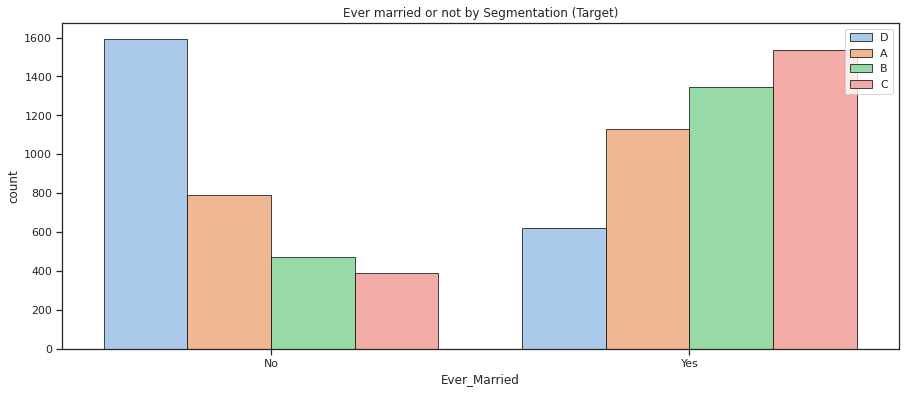

In [ ]:
# plot of ever married or not by Segmentation (target)
pl.figure(figsize=(15,6))
sns.countplot(x = df.Ever_Married , hue = df.Segmentation,
                  edgecolor=(0,0,0), linewidth=0.7).set(title= 'Ever married or not by Segmentation (Target)');
pl.legend(loc='upper right');
pl.savefig("Ever_Married_by_Segmentation.png")
# pl.legend(labels=["A", "B", "C","D"]);

#####As you can see from the plot above:

- In general, married customers are the most in all segmentation
- Unmarried customers in the D segmentation are more than the rest of the segmentations, and the reason is that most of the customers in this segmentation are at the young age

- Most of the customers in the C segmentation are married.

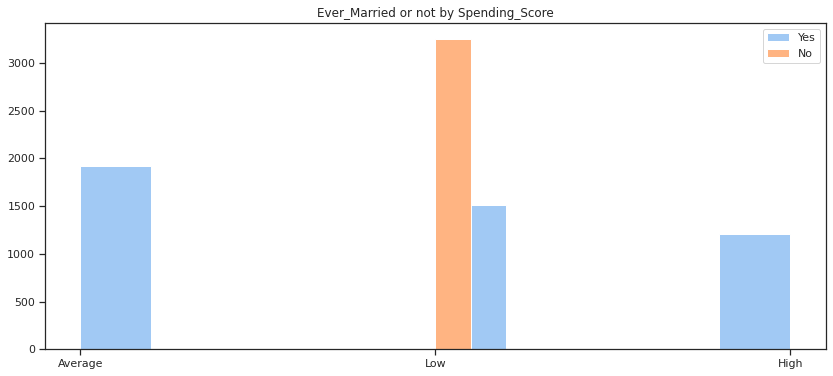

In [ ]:
# hist plot of ever married or not by Spending Score
pl.figure(figsize=(14,6))
pl.hist(df.Spending_Score[df.Ever_Married=="Yes"], bins = 10,label="Yes")
pl.hist(df.Spending_Score[df.Ever_Married=="No"], bins = 10,label="No")
pl.title("Ever_Married or not by Spending_Score")
pl.legend()
pl.show()

#####As you can see from the plot above:
- There are no unmarried people with a high or average spending score
- Unmarrried people have a low spending score
- The spending score of married people ranges from average to high 
- For these reasons, it makes sense to replace null values for ever married depending on the spending score

####Age

<Figure size 1080x576 with 0 Axes>

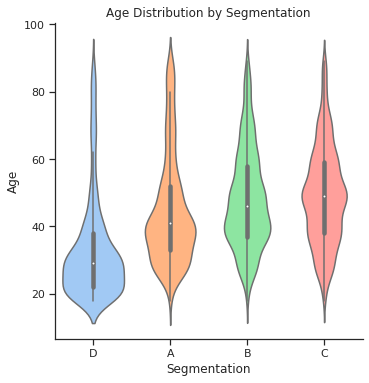

In [ ]:
pl.figure(figsize=(15,8));
sns.catplot(x="Segmentation", y="Age",
            kind="violin", split=True, data=df,saturation=1,
                  edgecolor=(0,0,0)).set(title= 'Age Distribution by Segmentation');
pl.savefig("Age_by_Segmentation.png")

#####As you can see from the plot above:

*   In the D segmentation, most customers are between 20 to 30 years old

*   In the A segmentation, customers range in age from 20 to 30 years, and the most are 40

*   In the B segmentation, most customers are 40 years and over

*   In the C segmentation, customers range in age from 40 to 80 years, and most of them are 45


####Graduated
Graduated by Segmentation

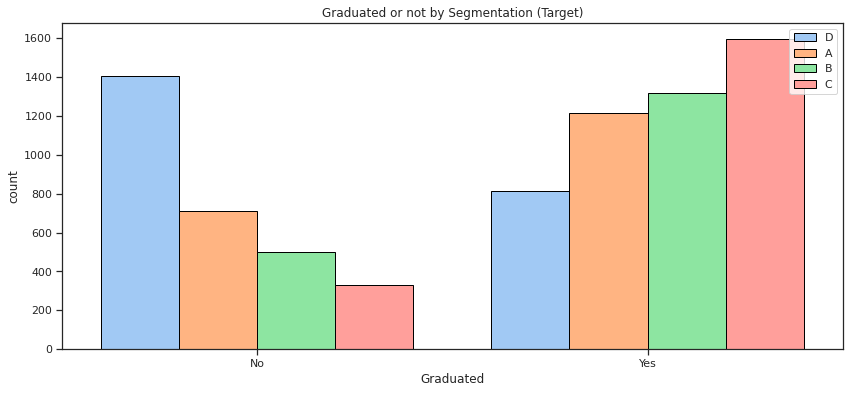

In [ ]:
# plot for graduated or not by Segmentation
pl.figure(figsize=(14,6))
sns.countplot(x = df.Graduated , hue = df.Segmentation , saturation=1,
                  edgecolor=(0,0,0)).set(title= 'Graduated or not by Segmentation (Target)');
pl.legend(loc='upper right');
pl.savefig("Graduated_by_Segmentation.png")
# pl.legend(labels=["A", "B", "C","D"]); 

- Most of the graduated customers are from the C segmentation, while most of the non-graduating customers are from the D segmentation

Graduated by Age

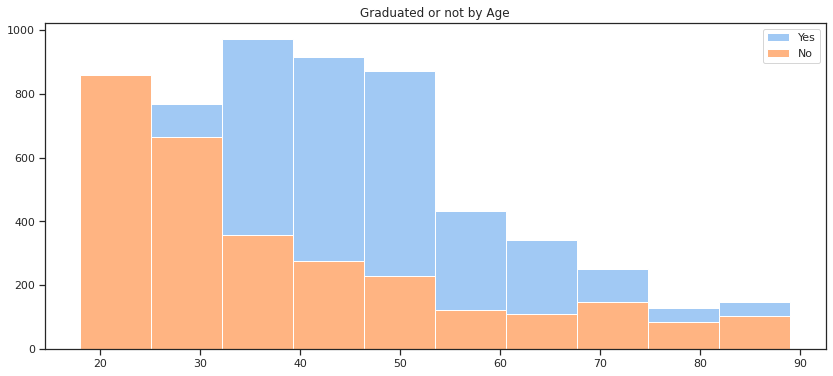

<Figure size 432x288 with 0 Axes>

In [ ]:
# hist plot for graduated or not by age

pl.figure(figsize=(14,6))
pl.hist(df.Age[df.Graduated=="Yes"], bins = 10,label="Yes")
pl.hist(df.Age[df.Graduated=="No"], bins = 10,label="No")
pl.title("Graduated or not by Age")
pl.legend()
pl.show()
pl.savefig("Graduated_by_Age.png")

#####As you can see from the plot above:

- The majority of those under the age of 25 are not graduates, it makes sense to replace null values for 'Graduated' column depending on whether the age less than 23 or older

####Profession

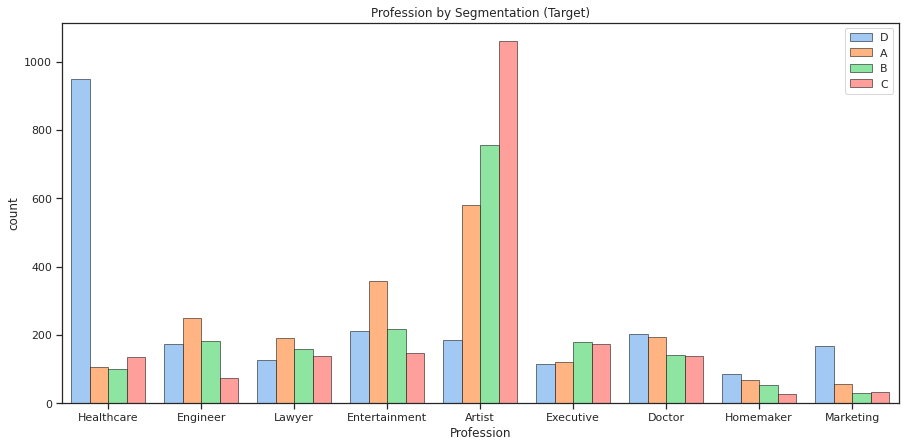

In [ ]:
# plot of Profession or not by segmentation
pl.figure(figsize=(15,7))
sns.countplot(x = df.Profession , hue = df.Segmentation , saturation=1,
                  edgecolor=(0,0,0), linewidth=0.5).set(title= 'Profession by Segmentation (Target)');
pl.legend(loc='upper right');
pl.savefig("Profession_by_Segmentation.png")

#####As you can see from the plot above:
- Most of the customers from all segmentations are artists.
- Most of the customers in the D segmentation are unmarried & have a healthcare profession.
- Most of the customers in the C segmentation are married & have a artist profession.

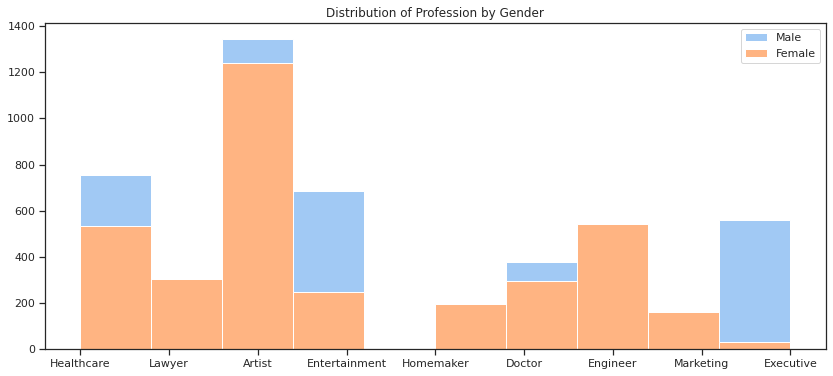

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot of distribution of Profession by Gender

pl.figure(figsize=(14,6))
pl.hist(df.Profession[df.Gender=="Male"], bins = 10,label="Male")
pl.hist(df.Profession[df.Gender=="Female"], bins = 10,label="Female")
pl.title("Distribution of Profession by Gender")
pl.legend()
pl.show()
pl.savefig("Profession_Distribution_by_Gender.png")

- The professions of most men are Healthcare, Artist, Entertainment, Doctor & Executive.
- The professions of most women are Homemaker, Engineer & Artist

####Work_Experience

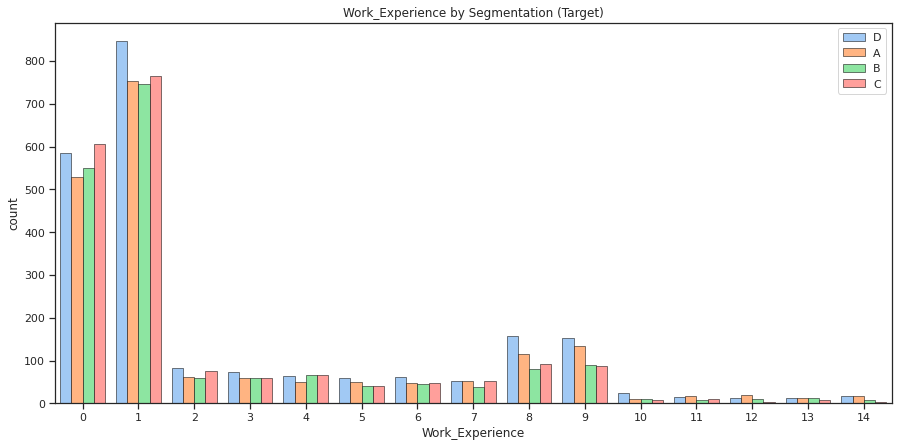

In [ ]:
# plot of distribution of Work_Experience separated by Segmentation
pl.figure(figsize=(15,7))
sns.countplot(x = df.Work_Experience , hue = df.Segmentation , saturation=1,
                  edgecolor=(0,0,0), linewidth=0.5).set(title= 'Work_Experience by Segmentation (Target)');

pl.legend(loc='upper right');
pl.savefig("Work_Experience_by_Segmentation.png")

#####As you can see from the plot above:
- Most of the customers of all categories have little work experience.

####Spending_Score

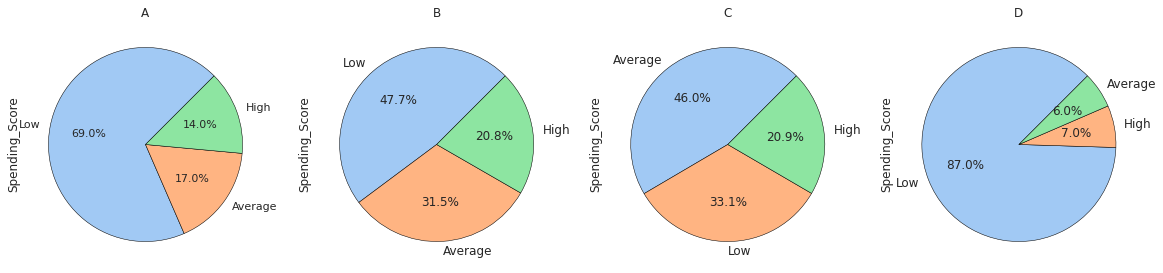

In [ ]:
pl.figure(figsize=(20,20))
pl.subplot(1, 4 , 1)
df['Spending_Score'][df['Segmentation']=='A'].value_counts().plot.pie( autopct='%1.1f%%', startangle=45 , textprops={'fontsize': 11},
                                  wedgeprops = {"edgecolor" : "black",'linewidth': 0.5}).set(title = 'A');

pl.subplot(1, 4 , 2)
df['Spending_Score'][df['Segmentation']=='B'].value_counts().plot.pie( autopct='%1.1f%%', startangle=45 , textprops={'fontsize': 12},
                                  wedgeprops = {"edgecolor" : "black",'linewidth': 0.5}).set(title = 'B');

pl.subplot(1, 4 , 3)
df['Spending_Score'][df['Segmentation']=='C'].value_counts().plot.pie( autopct='%1.1f%%', startangle=45 , textprops={'fontsize': 12},
                                  wedgeprops = {"edgecolor" : "black",'linewidth': 0.5}).set(title = 'C');

pl.subplot(1, 4 , 4)
df['Spending_Score'][df['Segmentation']=='D'].value_counts().plot.pie( autopct='%1.1f%%', startangle=45 , textprops={'fontsize': 12},
                                  wedgeprops = {"edgecolor" : "black",'linewidth': 0.5}).set(title = 'D');
pl.savefig("Spending_Score_by_Segmentation.png")

#####As you can see from the plot above:

The spending score in the D segmentation is low, and the reasons are:
1.   Most of the customers are young men who are not graduates, 
2.   Most of the customers are not married, so the family size is less, so they pay less.

The C & B segmentations have a low to medium spending score.

The highest spending score in the C segmentation is average due to the large family size


####Family_Size

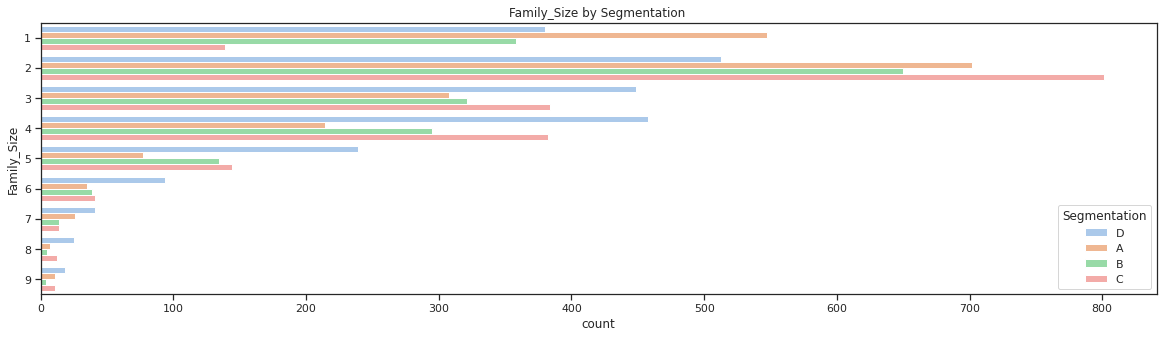

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot of distribution of Family_Size separated by Segmentation
fig=pl.figure(figsize=(20,5))
sns.countplot(y='Family_Size',hue='Segmentation',data=df)
pl.title("Family_Size by Segmentation ")
pl.show();
pl.savefig("Family_Size_by_Segmentation.png")

####Category

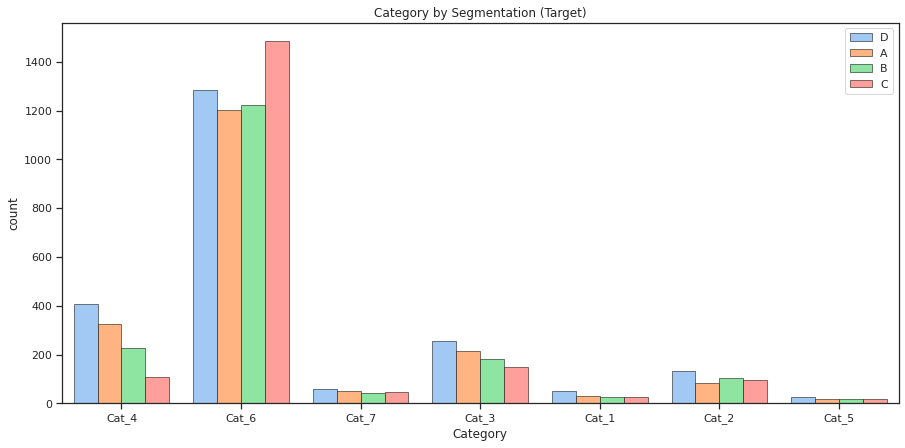

In [ ]:
pl.figure(figsize=(15,7))
sns.countplot(x = df.Category , hue = df.Segmentation , saturation=1,
                  edgecolor=(0,0,0), linewidth=0.5).set(title= 'Category by Segmentation (Target)');

pl.legend(loc='upper right');
pl.savefig("Category_by_Segmentation.png")

#####As you can see from the plot above:

- Most of the customers are from category 6, while they are few in the rest of the categories

###Data Preparation

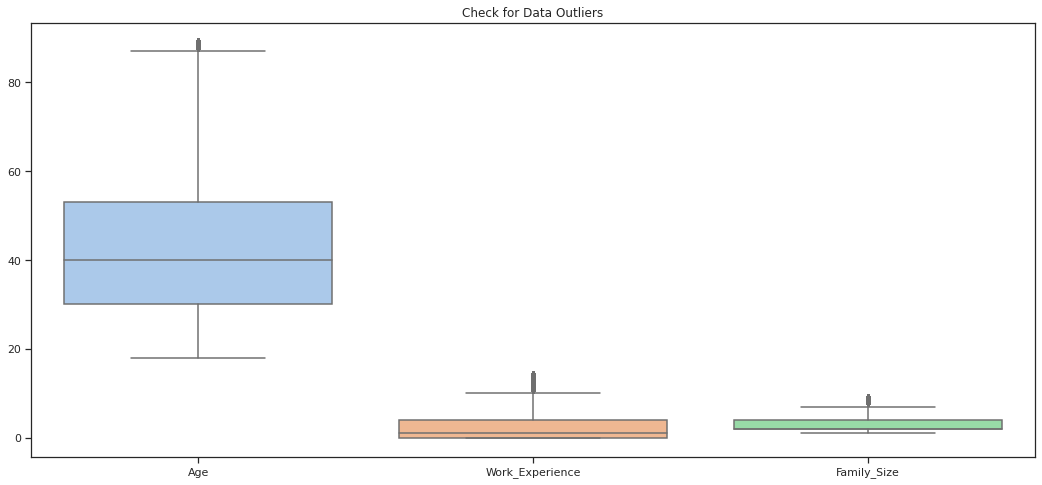

<Figure size 432x288 with 0 Axes>

In [ ]:
# checking for Data Outliers
fig=pl.figure(figsize=(18,8))
sns.boxplot(data=df)
pl.title('Check for Data Outliers')
pl.show()
pl.savefig("Data_Outliers.png");

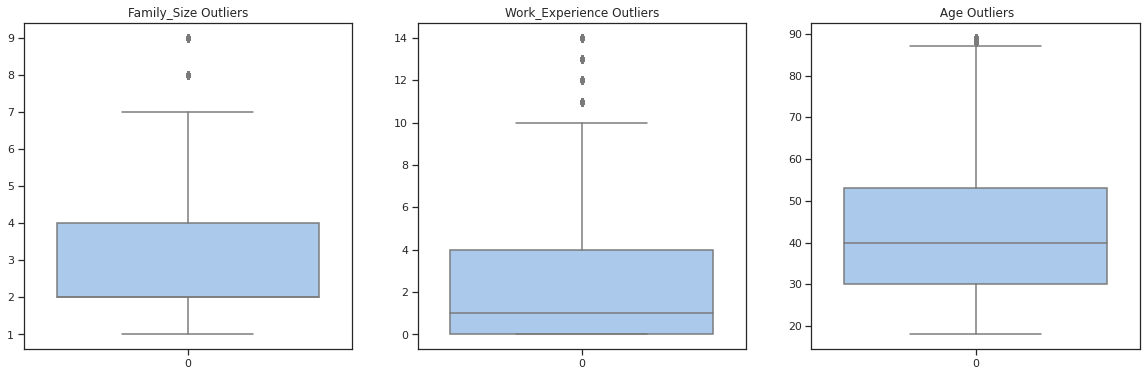

In [ ]:
# boxplot for 'Family_Size' column Outliers, Outliers > 7
fig= pl.figure(figsize=(20,6))
pl.subplot(1 , 3 , 1)
pl.title('Family_Size Outliers')
sns.boxplot(data = df.Family_Size);

# boxplot for 'Work_Experience' column Outliers, Outliers > 10
pl.subplot(1 , 3 , 2)
pl.title('Work_Experience Outliers')
sns.boxplot(data = df.Work_Experience);

# boxplot for 'Age' column Outliers, Outliers > 86
pl.subplot(1 , 3 , 3)
pl.title(' Age Outliers')
sns.boxplot(data = df.Age);

In [ ]:
df.describe()

,Age,Work_Experience,Family_Size
count,7892.000000,7892.000000,7892.000000
mean,43.499366,2.472250,2.814876
std,16.720385,3.266845,1.511437
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,2.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


####Remove Outliers Data

In [ ]:
Q1 = df["Family_Size"].quantile(0.25)

Q3 = df["Family_Size"].quantile(0.75)

IQR = Q3 - Q1

Uper_Fence = Q3 + (1.5 * IQR)
Uper_Fence

7.0

In [ ]:
# show 'Family_Size' outliers data
df[df.Family_Size > Uper_Fence]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
26,Male,No,31,No,Healthcare,9,Low,8,Cat_4,A
150,Male,Yes,67,No,Lawyer,0,High,9,Cat_4,A
202,Female,Yes,25,No,Engineer,6,Average,8,Cat_4,D
292,Female,No,32,No,Artist,1,Low,8,Cat_6,C
344,Female,No,26,No,Healthcare,1,Low,8,Cat_7,C
...,...,...,...,...,...,...,...,...,...,...
7799,Male,No,19,No,Healthcare,6,Low,8,Cat_7,D
7897,Female,Yes,41,No,Doctor,0,Average,9,Cat_4,D
7900,Male,No,31,No,Healthcare,3,Low,9,Cat_6,D
7993,Female,No,26,No,Healthcare,1,Low,8,Cat_4,C


In [ ]:
# drop 'Family_Size' outliers data > 7
df = df.drop(df[df['Family_Size'] > Uper_Fence].index)

In [ ]:
Q1 = df["Work_Experience"].quantile(0.25)

Q3 = df["Work_Experience"].quantile(0.75)

IQR = Q3 - Q1

Uper_Fence = Q3 + (1.5 * IQR)
Uper_Fence

10.0

In [ ]:
# show 'Work_Experience' outliers data
df[df.Work_Experience > Uper_Fence]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
20,Male,Yes,49,Yes,Homemaker,12,Low,1,Cat_3,A
22,Male,Yes,33,Yes,Artist,13,Low,2,Cat_3,A
42,Female,No,27,Yes,Artist,14,Low,3,Cat_6,A
55,Male,Yes,32,Yes,Artist,14,Average,2,Cat_6,B
176,Female,No,23,No,Engineer,11,Low,1,Cat_3,D
...,...,...,...,...,...,...,...,...,...,...
7835,Male,Yes,39,Yes,Artist,13,Low,2,Cat_6,B
7870,Female,No,27,No,Artist,12,Low,3,Cat_6,D
7990,Female,No,43,Yes,Entertainment,14,Low,1,Cat_6,A
8028,Male,Yes,40,Yes,Artist,13,High,1,Cat_4,D


In [ ]:
# drop 'Work_Experience' outliers data > 10
df = df.drop(df[df['Work_Experience'] > Uper_Fence].index)

In [ ]:
Q1 = df["Age"].quantile(0.25)

Q3 = df["Age"].quantile(0.75)

IQR = Q3 - Q1

Uper_Fence = Q3 + (1.5 * IQR)
Uper_Fence

86.0

In [ ]:
# show 'Age' outliers data
df[df.Age > Uper_Fence]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
395,Female,Yes,89,No,Lawyer,3,High,1,Cat_6,D
460,Female,Yes,87,Yes,Lawyer,0,High,2,Cat_6,C
656,Male,Yes,87,No,Executive,1,Low,2,Cat_6,A
699,Male,Yes,88,No,Executive,0,Low,1,Cat_6,A
753,Female,Yes,88,No,Lawyer,0,High,2,Cat_6,B
...,...,...,...,...,...,...,...,...,...,...
7864,Male,Yes,88,Yes,Artist,0,High,2,Cat_6,C
7866,Male,Yes,88,Yes,Marketing,0,High,2,Cat_6,C
7882,Female,Yes,87,Yes,Lawyer,0,Low,2,Cat_6,B
7920,Female,Yes,89,No,Lawyer,1,High,2,Cat_6,D


In [ ]:
# drop 'Age' outliers data > 86
df = df.drop(df[df['Age'] > Uper_Fence].index)

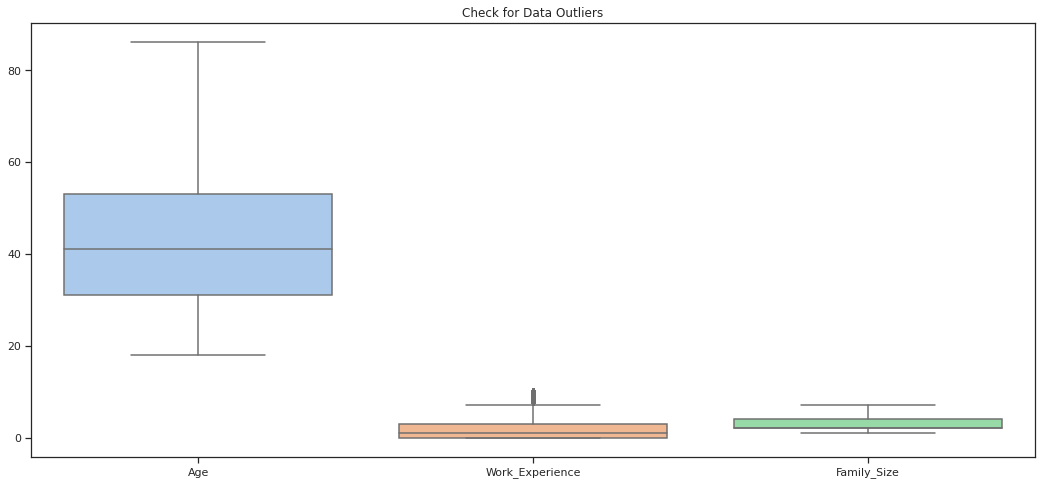

In [ ]:
# checking for Data after remove Outliers
fig=pl.figure(figsize=(18,8))
sns.boxplot(data=df)
pl.title('Check for Data Outliers')
pl.show()

## Extract Features

#####Add New Features
- Age_Category: Young, Mature, Adult, Old

In [ ]:
df.Age.describe()

count    7521.000000
mean       43.197580
std        16.124377
min        18.000000
25%        31.000000
50%        41.000000
75%        53.000000
max        86.000000
Name: Age, dtype: float64

In [ ]:
# add a new feature 'Age_Category' to df dataset
df.loc[df['Age']<=35,'Age_Category']='Young'
df.loc[(df['Age']>25) & (df['Age']<=40),'Age_Category']='Mature'
df.loc[(df['Age']>40) & (df['Age']<=60),'Age_Category']='Adult'
df.loc[df['Age']>60,'Age_Category']='Old'

In [ ]:
# check 'Age_Category' values
df[['Age_Category']].value_counts()

Age_Category
Mature          2831
Adult           2563
Old             1204
Young            923
dtype: int64

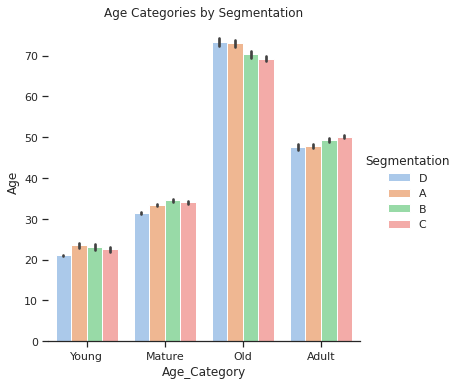

In [ ]:
# plot to show the age categories by Segmentation
g = sns.catplot(
    data=df, 
    kind="bar",
    x="Age_Category", 
    y="Age", 
    hue="Segmentation",
   
);
g.despine(left=True);
pl.title("Age Categories by Segmentation");
pl.savefig("Age_Categories_by_Segmentation.png");

- Family_Size_Category: Small, Mediam, Big Family

In [ ]:
# add a new feature 'Family_Size_Category' to df dataset
df.loc[df['Family_Size']<=2,'Family_Category']='Small Family'
df.loc[(df['Family_Size']>2) & (df['Family_Size']<=4),'Family_Category']='Medium Family'
df.loc[(df['Family_Size']>4) & (df['Family_Size']<=7),'Family_Category']='Big Family'


In [ ]:
df.Family_Size.unique()

array([4, 3, 1, 2, 6, 5, 7])

In [ ]:
# check 'Family_Category' values
df.Family_Category.value_counts()

Small Family     3886
Medium Family    2751
Big Family        884
Name: Family_Category, dtype: int64

In [ ]:
df.head(3)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation,Age_Category,Family_Category
0,Male,No,22,No,Healthcare,1,Low,4,Cat_4,D,Young,Medium Family
1,Female,Yes,38,Yes,Engineer,1,Average,3,Cat_4,A,Mature,Medium Family
2,Female,Yes,67,Yes,Engineer,1,Low,1,Cat_6,B,Old,Small Family


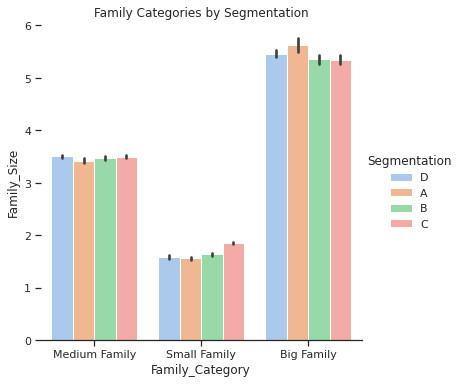

In [ ]:
# barplot to show the family categories by Segmentation

g = sns.catplot(
    data=df, 
    kind="bar",
    x="Family_Category", 
    y="Family_Size", 
    hue="Segmentation",
)
g.despine(left=True)
pl.title("Family Categories by Segmentation");
pl.savefig("Family_Categories_by_Segmentation.png");

###Transform Catagorical Data to 0 & 1


In [ ]:
df['Gender'].loc[df['Gender']=='Male'] = 1
df['Gender'].loc[df['Gender']=='Female'] = 0

df['Graduated'].loc[df['Graduated']=='Yes'] = 1
df['Graduated'].loc[df['Graduated']=='No'] = 0

df['Ever_Married'].loc[df['Ever_Married']=='Yes'] = 1
df['Ever_Married'].loc[df['Ever_Married']=='No'] = 0

###Convert Categorical Data to Numbers

In [ ]:
df['Segmentation'].loc[df['Segmentation']=='A'] = 1
df['Segmentation'].loc[df['Segmentation']=='B'] = 2
df['Segmentation'].loc[df['Segmentation']=='C'] = 3
df['Segmentation'].loc[df['Segmentation']=='D'] = 4

df['Spending_Score'].loc[df['Spending_Score']=='Low'] = 0
df['Spending_Score'].loc[df['Spending_Score']=='Average'] = 1
df['Spending_Score'].loc[df['Spending_Score']=='High'] = 2

In [ ]:
df.describe(exclude='number')

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Category,Segmentation,Age_Category,Family_Category
count,7521,7521,7521,7521,7521,7521,7521,7521,7521
unique,2,2,2,9,3,7,4,4,3
top,1,1,1,Artist,0,Cat_6,4,Mature,Small Family
freq,4151,4431,4733,2496,4534,4936,2103,2831,3886


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7521 entries, 0 to 8067
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           7521 non-null   object
 1   Ever_Married     7521 non-null   object
 2   Age              7521 non-null   int64 
 3   Graduated        7521 non-null   object
 4   Profession       7521 non-null   object
 5   Work_Experience  7521 non-null   int64 
 6   Spending_Score   7521 non-null   object
 7   Family_Size      7521 non-null   int64 
 8   Category         7521 non-null   object
 9   Segmentation     7521 non-null   object
 10  Age_Category     7521 non-null   object
 11  Family_Category  7521 non-null   object
dtypes: int64(3), object(9)
memory usage: 1.1+ MB


### Converting Categorical Data to dummy variables


In [ ]:
# converting Categorical variables into dummy variables
pf = pd.get_dummies(df.Profession,prefix='Profession')
df = pd.concat([df,pf],axis=1)
df=df.drop(columns='Profession',axis=1)

In [ ]:
vr = pd.get_dummies(df.Category,prefix='Category')
df = pd.concat([df,vr],axis=1)
df=df.drop(columns='Category',axis=1)

In [ ]:
pf = pd.get_dummies(df.Age_Category,prefix='Age_Category')
df = pd.concat([df,pf],axis=1)
df=df.drop(columns='Age_Category',axis=1)

In [ ]:
pf = pd.get_dummies(df.Family_Category,prefix='Family_Category')
df = pd.concat([df,pf],axis=1)
df=df.drop(columns='Family_Category',axis=1)

In [ ]:
df.head(2)

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Category_Cat_1,Category_Cat_2,Category_Cat_3,Category_Cat_4,Category_Cat_5,Category_Cat_6,Category_Cat_7,Age_Category_Adult,Age_Category_Mature,Age_Category_Old,Age_Category_Young,Family_Category_Big Family,Family_Category_Medium Family,Family_Category_Small Family
0,1,0,22,0,1,0,4,4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,0,1,38,1,1,1,3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


##Split The Data 

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='Blues')

,Age,Work_Experience,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Category_Cat_1,Category_Cat_2,Category_Cat_3,Category_Cat_4,Category_Cat_5,Category_Cat_6,Category_Cat_7,Age_Category_Adult,Age_Category_Mature,Age_Category_Old,Age_Category_Young,Family_Category_Big Family,Family_Category_Medium Family,Family_Category_Small Family
Age,1.000000,-0.165236,-0.269879,0.128191,-0.112385,-0.025182,-0.002282,0.131328,-0.449271,-0.053444,0.523539,-0.077334,-0.027820,-0.091452,-0.085389,-0.096501,-0.035621,0.194845,-0.037512,0.262749,-0.486726,0.754656,-0.504221,-0.166146,-0.182062,0.282554
Work_Experience,-0.165236,1.000000,-0.059080,0.014566,-0.004774,0.001395,0.005882,-0.020873,0.000853,0.152005,-0.105196,-0.004386,-0.023924,0.026536,-0.009225,-0.028761,0.003225,0.019660,0.000637,-0.042456,0.168292,-0.151080,-0.018326,-0.018287,-0.052367,0.062258
Family_Size,-0.269879,-0.059080,1.000000,-0.142915,0.004466,0.018982,-0.017270,0.112972,0.237161,-0.067912,-0.170019,0.019571,0.020650,0.096672,0.012900,0.128837,0.039826,-0.170491,0.030385,-0.040676,0.031957,-0.190642,0.224620,0.701817,0.391243,-0.829399
Profession_Artist,0.128191,0.014566,-0.142915,1.000000,-0.216406,-0.217864,-0.259845,-0.199514,-0.313300,-0.120322,-0.195233,-0.136781,-0.011143,-0.020603,-0.042113,-0.097174,-0.006274,0.108135,0.008335,0.266544,-0.063250,-0.067435,-0.216272,-0.101153,-0.068577,0.131288
Profession_Doctor,-0.112385,-0.004774,0.004466,-0.216406,1.000000,-0.094917,-0.113207,-0.086923,-0.136496,-0.052421,-0.085058,-0.059592,-0.004365,0.013407,0.013388,0.014246,-0.012072,-0.028214,0.020646,-0.038815,0.094953,-0.086238,0.012240,-0.001713,0.011783,-0.010253
Profession_Engineer,-0.025182,0.001395,0.018982,-0.217864,-0.094917,1.000000,-0.113970,-0.087509,-0.137416,-0.052774,-0.085631,-0.059993,-0.012072,-0.027368,0.024380,0.131690,0.006460,-0.096766,0.004836,0.031267,0.058429,-0.061705,-0.062481,0.036426,-0.009734,-0.014094
Profession_Entertainment,-0.002282,0.005882,-0.017270,-0.259845,-0.113207,-0.113970,1.000000,-0.104371,-0.163895,-0.062943,-0.102131,-0.071554,0.001394,0.010736,0.036804,0.013831,-0.000387,-0.037663,-0.003928,0.042609,0.034861,-0.038070,-0.070478,-0.013717,-0.012927,0.021299
Profession_Executive,0.131328,-0.020873,0.112972,-0.199514,-0.086923,-0.087509,-0.104371,1.000000,-0.125842,-0.048329,-0.078418,-0.054940,0.009167,-0.022161,-0.048232,0.003409,-0.018457,0.045704,-0.016080,0.069408,-0.073340,0.079792,-0.081141,0.047910,0.085210,-0.113004
Profession_Healthcare,-0.449271,0.000853,0.237161,-0.313300,-0.136496,-0.137416,-0.163895,-0.125842,1.000000,-0.075892,-0.123142,-0.086274,0.007007,0.083876,0.010523,0.032441,0.026717,-0.083312,0.018308,-0.281071,0.084192,-0.184304,0.487663,0.142518,0.154002,-0.240282
Profession_Homemaker,-0.053444,0.152005,-0.067912,-0.120322,-0.052421,-0.052774,-0.062943,-0.048329,-0.075892,1.000000,-0.047292,-0.033133,0.001958,0.005755,0.052133,-0.005929,0.006793,-0.026649,-0.022201,-0.031430,0.094008,-0.046117,-0.041869,-0.032442,-0.048110,0.067278


- As you see, when the new features added for the data as Age_Category_Young improve the correlation by 0.332360 with the target (segmentation)
- In addition, added Family Categories features (Big & Medium) little improve the correlation with the target (segmentation)

In [ ]:
# select split parameter
X = df.drop(['Segmentation'], axis=1)
y = df.Segmentation.astype("int")

# splitting into train and test sets 
X_train, X_test ,y_train , y_test = train_test_split(X,y, test_size=0.7, random_state= 40)

## Baseline Model

- Here I create a baseline model to compare it with my model, and whene I make prediction the score I got 0.24 for the accuracy score

In [ ]:
def baseline_model(n_predictions, value_to_predict):
    
    baseline_preds = []
    for i in range(n_predictions): 
        baseline_preds.append(value_to_predict) 
    return pd.Series(baseline_preds) 

n_predictions = len(y_test)  
baseline_value = y_train.value_counts().index[0] 

baseline_preds = baseline_model(n_predictions, baseline_value)
baseline_preds 

0       4
1       4
2       4
3       4
4       4
       ..
5260    4
5261    4
5262    4
5263    4
5264    4
Length: 5265, dtype: int64

In [ ]:
base_accuracy = accuracy_score(y_test , baseline_preds)
print('Accuracy of Baseline Model: ',base_accuracy)

Accuracy of Baseline Model:  0.2797720797720798


## Data Scaling

In [ ]:
# scale the X data 
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train) 
X_test_scale  = scaler.transform(X_test)   

In [ ]:
X_train_scale 

array([[ 0.88271162, -1.22973552, -0.85094843, ..., -0.37258392,
         1.31200268, -1.02150784],
       [-1.13287281,  0.81318299,  0.25634525, ...,  2.68395908,
        -0.76219357, -1.02150784],
       [ 0.88271162, -1.22973552, -0.17426896, ..., -0.37258392,
        -0.76219357,  0.97894501],
       ...,
       [ 0.88271162, -1.22973552, -0.29730159, ..., -0.37258392,
        -0.76219357,  0.97894501],
       [-1.13287281,  0.81318299,  0.37937788, ..., -0.37258392,
         1.31200268, -1.02150784],
       [ 0.88271162,  0.81318299,  1.79425314, ..., -0.37258392,
        -0.76219357,  0.97894501]])

## Data Modeling


####Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
lr.fit(X_train_scale, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_preds = lr.predict(X_test_scale)
lr_preds

array([1, 1, 3, ..., 1, 3, 4])

In [ ]:
lr_Accuracy = accuracy_score(y_test , lr_preds)
print('Accuracy of LR: ',lr_Accuracy)

Accuracy of LR:  0.5031339031339032


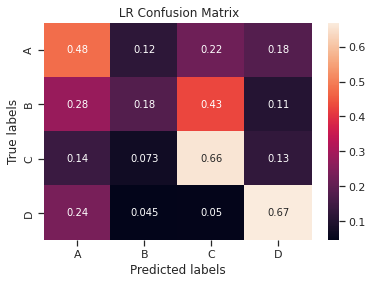

In [ ]:
ax= pl.subplot()
sns.heatmap(confusion_matrix(y_test, lr_preds, normalize='true'),ax=ax, annot=True);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['A', 'B','C','D']); 
ax.yaxis.set_ticklabels(['A', 'B','C','D']);
ax.set_title(' LR Confusion Matrix');

####Random Forest Classifier

In [ ]:
rfr = RandomForestClassifier()

rfr.fit(X_train_scale, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
preds = rfr.predict(X_test_scale)

preds[-5: ]

array([4, 4, 1, 2, 4])

In [ ]:
rfr_accuracy= accuracy_score(y_test, preds)
print('Accuracy of Random Forest Model: ',rfr_accuracy)

Accuracy of Random Forest Model:  0.4835707502374169


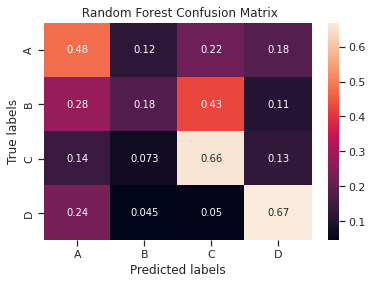

In [ ]:
ax= pl.subplot()
sns.heatmap(confusion_matrix(y_test, lr_preds, normalize='true'),ax=ax, annot=True);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['A', 'B','C','D']); 
ax.yaxis.set_ticklabels(['A', 'B','C','D']);
ax.set_title(' Random Forest Confusion Matrix');

####Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scale, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt.feature_importances_

array([0.03795031, 0.02566838, 0.35416592, 0.02691957, 0.13338739,
       0.05909086, 0.07050811, 0.04309827, 0.01057153, 0.00984405,
       0.01468178, 0.01241679, 0.01413194, 0.01005403, 0.00662808,
       0.01456059, 0.00562725, 0.00970934, 0.01809659, 0.0157533 ,
       0.0005012 , 0.03488639, 0.00815469, 0.01350584, 0.00949872,
       0.0013783 , 0.00341001, 0.00833952, 0.01690752, 0.01055374])

In [ ]:
preds_dt = dt.predict(X_test_scale)
preds_dt

array([2, 4, 1, ..., 2, 1, 4])

In [ ]:
dt_accuracy= accuracy_score(y_test, preds_dt)
print('Accuracy of DT Model: ',dt_accuracy)

Accuracy of DT Model:  0.4355175688509022


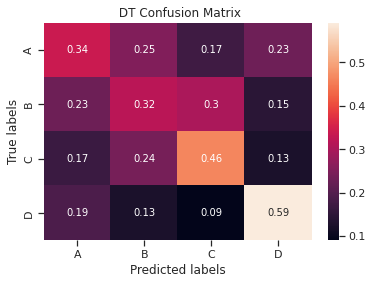

In [ ]:
ax= pl.subplot()
sns.heatmap(confusion_matrix(y_test, preds_dt, normalize='true'), annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['A', 'B','C','D']); 
ax.yaxis.set_ticklabels(['A', 'B','C','D']);
ax.set_title(' DT Confusion Matrix');

####KNeighbors Classifier


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scale, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
perds_knn = knn.predict(X_test_scale)
perds_knn

array([1, 1, 3, ..., 1, 2, 4])

In [ ]:
knn_Accurcy = accuracy_score(y_test, perds_knn)
print('Accuracy of Knn: ',knn_Accurcy)

Accuracy of Knn:  0.4697056030389364


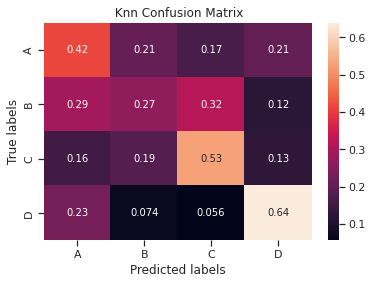

In [ ]:
ax= pl.subplot()
sns.heatmap(confusion_matrix(y_test, perds_knn, normalize='true'), annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['A', 'B','C','D']); 
ax.yaxis.set_ticklabels(['A', 'B','C','D']);
ax.set_title(' Knn Confusion Matrix');

###GridSearchCV:

- As you can see, the lr accuracy = **0.5031339031339032** , when we add more parameters that will improve the accuracy score of DT model, you can see tha accuracy score be better. And this what we will do by the GridSearch.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid ={
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty':['l1', 'l2', 'elasticnet'],
    'fit_intercept': [True, False],
    'max_iter': [10,100],
    'solver': ['lbfgs', 'liblinear', 'saga']

}

# Make GridSearchCV
grid = GridSearchCV(lr, param_grid,cv=10 )
grid

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'fit_intercept': [True, False], 'max_iter': [10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fa

In [ ]:
# fit X_train and y_train into grid_search
grid.fit(X_train_scale, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'fit_intercept': [True, False], 'max_iter': [10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fa

In [ ]:
best_score = grid.best_score_
best_score 

0.5088790560471976

#### Compare Results by Bar Plot 

In [ ]:
# Save each Accuracy with its model name in a data frame
accuracies = pd.DataFrame()
accuracies['names'] = ['Baseline','Logistic' , 'Random','DT','Knn','Logistic After Grid']
accuracies['values'] =[base_accuracy , lr_Accuracy , rfr_accuracy , dt_accuracy , knn_Accurcy, best_score]

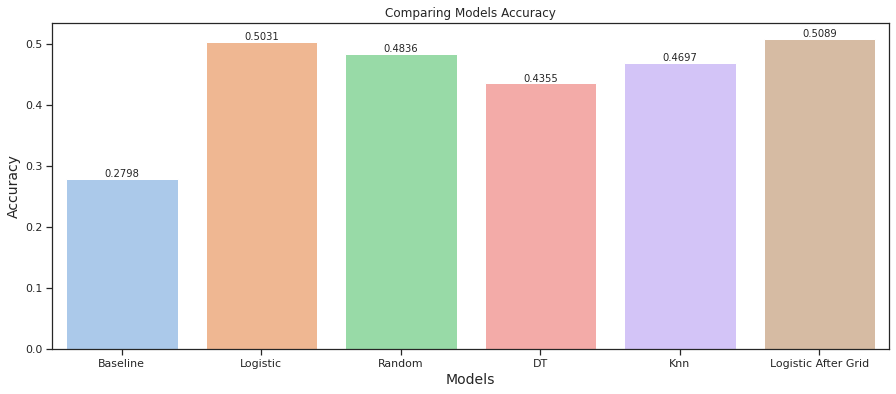

In [ ]:
# barplot to compare the results
pl.figure(figsize=(15, 6))
splot=sns.barplot(x="names",y="values",data=accuracies)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
pl.xlabel("Models", size=14)
pl.ylabel("Accuracy", size=14)
pl.title('Comparing Models Accuracy');

## Stacking Classifier for Predict The Best Performance



In [ ]:
# Create a models dictionary store all Classifiers
models = {
    "lr": LogisticRegression(),
    "knn": KNeighborsClassifier(),
    "dt": DecisionTreeClassifier(),
    "rfr": RandomForestClassifier()}

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=7000)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores


In [ ]:
result_ls = []
model_ls = []

for key, value in models.items():

    # cross validation scores for all Classifiers
    score = evaluate_model(value, X, y)
    result_ls.append(score) 
    model_ls.append(key) 
    print(f"Model: {key}, Score: {np.mean(score)}")


Model: lr, Score: 0.49740837279988687
Model: knn, Score: 0.4466831748780661
Model: dt, Score: 0.43092652152399796
Model: rfr, Score: 0.4824481780589525


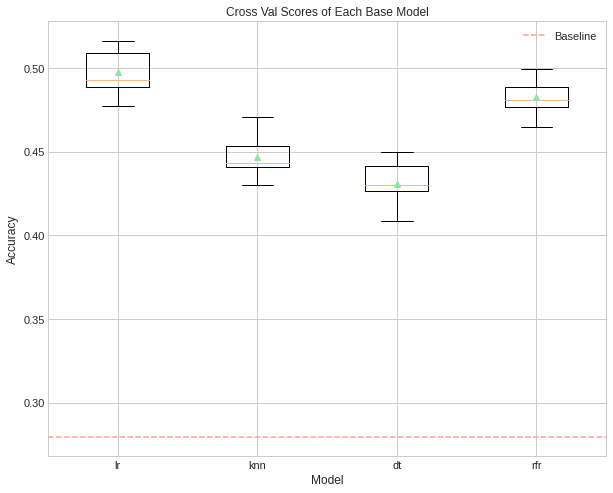

In [ ]:
pl.style.use("seaborn-whitegrid")
pl.figure(figsize=(10,8))
pl.boxplot(result_ls, labels=model_ls, showmeans=True)
pl.title("Cross Val Scores of Each Base Model")
pl.xlabel("Model")
pl.axhline(0.2797720797720798, linestyle="--", c="r", label="Baseline")
pl.legend()
pl.ylabel("Accuracy");

####Stack Model

In [ ]:
stack_ls = [
            ("lr", LogisticRegression()),
            ("knn", KNeighborsClassifier()),
            ("dt", DecisionTreeClassifier()),
            ('rfr',RandomForestClassifier())]

stack_model = StackingClassifier(stack_ls, cv=5)

models["stacked"] = stack_model

In [ ]:
result_ls = []
model_ls = []

for key, value in models.items():

    # cross validation scores for all Classifiers
    score = evaluate_model(value, X, y)
    result_ls.append(score)
    model_ls.append(key) 
    print(f"Model: {key}, Score: {np.mean(score)}")

Model: lr, Score: 0.49740837279988687
Model: knn, Score: 0.4466831748780661
Model: dt, Score: 0.43019509436629677
Model: rfr, Score: 0.4799228193256521
Model: stacked, Score: 0.511434403053651


####GridSearch

In [ ]:
param_grid = {
    "dt__random_state": [7, 10], 
    "dt__max_depth": [None, 6],
    "lr__solver": ["lbfgs", "liblinear"],
    "knn__n_neighbors": [5,10],
    "rfr__max_depth": [None, 6],
    "rfr__n_estimators": [1000, 2000] 
}

grid_model = GridSearchCV(estimator=stack_model, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
grid_model.fit(X,y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 98.2min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 198.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=5,
                                          estimators=[('lr',
                                                       LogisticRegression(C=1.0,
                                                                          class_weight=None,
                                                                          dual=False,
                                                                          fit_intercept=True,
                                                                          intercept_scaling=1,
                                                                          l1_ratio=None,
                                                                          max_iter=100,
                                                                          multi_class='auto',
                                                                          n_jobs=None,
                                                

In [116]:
grid_model.best_score_

0.5306466035201809

In [117]:
grid_model.best_params_

{'dt__max_depth': None,
 'dt__random_state': 10,
 'knn__n_neighbors': 5,
 'lr__solver': 'lbfgs',
 'rfr__max_depth': 6,
 'rfr__n_estimators': 1000}

In [121]:
# Pull out best model CV results to plot alongside all models tested
grid_df = pd.DataFrame(grid_model.cv_results_)
grid_cv_score_best = grid_df[grid_df["rank_test_score"]==1].loc[:,"split0_test_score":"split4_test_score"].T[18].values

In [122]:
grid_cv_score_best

array([0.53754153, 0.52992021, 0.51861702, 0.53390957, 0.53324468])

In [123]:
# Add results to running list of other model scores
result_ls.append(grid_cv_score_best)
model_ls.append("grid")

<Figure size 432x288 with 0 Axes>

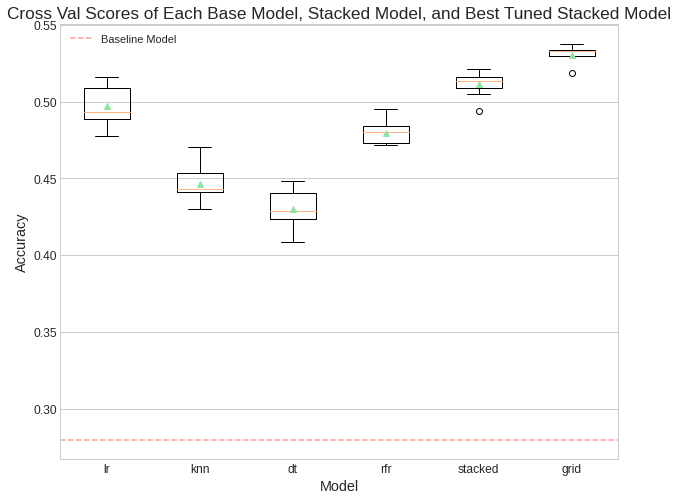

In [128]:
# plot results
pl.style.use("seaborn-whitegrid")
pl.tight_layout()
pl.figure(figsize=(10,8))
pl.boxplot(result_ls, labels=model_ls, showmeans=True)
pl.title("Cross Val Scores of Each Base Model, Stacked Model, and Best Tuned Stacked Model", fontsize="xx-large")
pl.xlabel("Model", fontsize="x-large")
pl.xticks(fontsize="large")
pl.yticks(fontsize="large")
pl.axhline(0.2797720797720798, linestyle="--", c="r", label="Baseline Model")
pl.legend()
pl.ylabel("Accuracy", fontsize="x-large")
pl.grid(b=None, axis="x")
pl.savefig("Cross_Val_Scoresmodel.png", dpi=150);